<a href="https://colab.research.google.com/github/iamsonuram/ML_Classification_Regression/blob/main/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing Libraries***

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context("paper")
from datetime import datetime
import plotly.io as pio
pio.templates.default = "seaborn"

# ***DATA PREPROCESSING***

## Load the dataset.

In [2]:
data = pd.read_csv('covid_19_clean_complete.csv')

## Explore and understand the data.

In [3]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


## Handle missing values, if any. Encode categorical variables

In [4]:
data.isna().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [5]:
data['Province/State'] = data['Province/State'].fillna('')
data.isna().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [6]:
print(data.columns)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')


## Split the data into training and testing sets.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = data.drop('Confirmed', axis=1)
y = data['Confirmed']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Shapes of the resulting sets to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (39254, 9)
X_test shape: (9814, 9)
y_train shape: (39254,)
y_test shape: (9814,)


In [8]:
X.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

# ***DATA VISUALIZATION***

## Active cases around the world

In [41]:
top = data[data['date'] == data['date'].max()]
world = top.groupby('Country/Region')['Confirmed','Active','Deaths'].sum().reset_index()
world.head()

<ipython-input-41-77a4b9d39273>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  world = top.groupby('Country/Region')['Confirmed','Active','Deaths'].sum().reset_index()


,Country/Region,Confirmed,Active,Deaths
0,0,1936390,1089052,46121
1,1,196702,72117,5708
2,2,1179755,345886,74060
3,3,94404,19907,5423
4,4,22662,15011,1078


In [52]:
figure = px.choropleth(world, locations="Country/Region",
                    locationmode='country names', color="Active",
                    hover_name="Country/Region", range_color=[1,500000],
                    color_continuous_scale="Peach",
                    title='Countries with Active Cases')
figure.show()

## Recovered count around the world

In [53]:
fig = px.scatter_mapbox(top, lat="Lat", lon="Long", hover_name="Country/Region", hover_data=["Country/Region","Recovered"],
                        color_discrete_sequence=["fuchsia"], zoom=0.5, height=300,title='Recovered count of each country' )
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

# ***CLASSIFICATION***

Convert categorical data into a numerical format using Label Encoder.

In [9]:
from sklearn.preprocessing import LabelEncoder
X.dropna(inplace=True)
le = LabelEncoder()
X['Country/Region'] = le.fit_transform(X['Country/Region'])

le = LabelEncoder()
X['Province/State'] = le.fit_transform(X['Province/State'])

le = LabelEncoder()
X['Date'] = le.fit_transform(X['Date'])

le = LabelEncoder()
X['WHO Region'] = le.fit_transform(X['WHO Region'])

In [10]:
X.dtypes

Province/State      int64
Country/Region      int64
Lat               float64
Long              float64
Date                int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region          int64
dtype: object

## **Logistic Regression**

### Training the classifiers on the training data.

In [11]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [12]:
#converting all the categorical variables into numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ["Country/Region","Province/State","Date","WHO Region"]
for f in cols:
    data[f] = le.fit_transform(data[f])
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,0,0,33.93911,67.709953,0,0,0,0,0,2
1,0,1,41.15330,20.168300,0,0,0,0,0,3
2,0,2,28.03390,1.659600,0,0,0,0,0,0
3,0,3,42.50630,1.521800,0,0,0,0,0,3
4,0,4,-11.20270,17.873900,0,0,0,0,0,0


In [13]:
data.corr()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
Province/State,1.000000e+00,-3.490964e-01,3.659055e-02,1.723209e-01,-1.061667e-15,-0.064416,-0.066985,-0.070715,-0.051168,4.126015e-01
Country/Region,-3.490964e-01,1.000000e+00,-1.398733e-02,-1.405829e-01,-4.509171e-15,0.069079,0.078781,0.039924,0.080102,-1.539766e-01
Lat,3.659055e-02,-1.398733e-02,1.000000e+00,-1.272594e-01,-2.266145e-15,0.036665,0.070040,0.015329,0.044392,2.356264e-01
Long,1.723209e-01,-1.405829e-01,-1.272594e-01,1.000000e+00,-1.533922e-16,-0.078911,-0.101340,-0.052391,-0.085688,6.631275e-01
Date,-1.061667e-15,-4.509171e-15,-2.266145e-15,-1.533922e-16,1.000000e+00,0.133539,0.128089,0.162148,0.095791,5.185166e-17
Confirmed,-6.441618e-02,6.907891e-02,3.666534e-02,-7.891069e-02,1.335386e-01,1.000000,0.912361,0.895506,0.950255,-3.651267e-02
Deaths,-6.698548e-02,7.878074e-02,7.003977e-02,-1.013400e-01,1.280885e-01,0.912361,1.000000,0.763090,0.891858,-2.903811e-02
Recovered,-7.071516e-02,3.992443e-02,1.532882e-02,-5.239063e-02,1.621482e-01,0.895506,0.763090,1.000000,0.713088,-2.613470e-02
Active,-5.116805e-02,8.010180e-02,4.439180e-02,-8.568801e-02,9.579107e-02,0.950255,0.891858,0.713088,1.000000,-3.976625e-02
WHO Region,4.126015e-01,-1.539766e-01,2.356264e-01,6.631275e-01,5.185166e-17,-0.036513,-0.029038,-0.026135,-0.039766,1.000000e+00


In [14]:
x = data.drop('Confirmed', axis=1)
y = data['Confirmed']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [15]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(x_train,y_train)

LinearRegression()

### Evaluate their performance using appropriate metrics.

In [16]:
print(slr.coef_)
print(slr.intercept_)
ypred_linear = slr.predict(x_test)
print(ypred_linear)

[-1.02384401e-12 -1.08824061e-12 -2.55554041e-14  2.94535663e-13
 -2.00167126e-13  1.00000000e+00  1.00000000e+00  1.00000000e+00
 -9.79941958e-13]
1.0550138540565968e-10
[3.5727e+04 8.0000e+01 3.3700e+02 ... 1.4100e+02 2.2000e+01 1.2750e+03]


In [17]:
from sklearn.metrics import mean_absolute_error, r2_score
r2_score(y_test, ypred_linear)

1.0

## **Random Forest**

### Training and evaluation of the classifiers on the training data.

In [18]:
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model.fit(X_train, y_train)

y_prediction_rf = model.predict(X_test)

from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
print('Accuracy metrics')
print('Accuracy is',metrics.accuracy_score(y_test,y_prediction_rf))
print('Confusion matrix')
print(metrics.confusion_matrix(y_test,y_prediction_rf))
print('Recall and Precison ')
print(metrics.recall_score(y_test,y_prediction_rf,average='weighted'))
print(metrics.precision_score(y_test,y_prediction_rf,average='weighted'))

Accuracy metrics
Accuracy is 0.0
Confusion matrix
[[0 0 0 ... 0 1 0]
 [0 0 1 ... 0 0 1]
 [1 0 0 ... 1 1 1]
 ...
 [0 0 1 ... 0 1 0]
 [0 0 0 ... 2 0 2]
 [2 0 1 ... 0 1 0]]
Recall and Precison 
0.0
0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Naïve Bayesian Classifier**

### Training the classifiers on the training data.

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

print ('\n The total number of Training Data :',y_train.shape)
print ('\n The total number of Test Data :',y_test.shape)

# Training Naive Bayes (NB) classifier on training data.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB().fit(X_train, y_train.ravel())
y_predicted_nb = clf.predict(X_test)


 The total number of Training Data : (32875,)

 The total number of Test Data : (16193,)


### Evaluate their performance using appropriate metrics.

In [20]:
from sklearn import metrics
print('\n Confusion matrix')
print(metrics.confusion_matrix(y_test,y_predicted_nb))
print('\n Accuracy of the classifier is',metrics.accuracy_score(y_test,y_predicted_nb))
print('\n The value of Precision', metrics.precision_score(y_test,y_predicted_nb,average='weighted'))
print('\n The value of Recall', metrics.recall_score(y_test,y_predicted_nb,average='weighted'))


 Confusion matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

 Accuracy of the classifier is 0.0030877539677638486

 The value of Precision 0.0002366108976750581

 The value of Recall 0.0030877539677638486


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **KNN Classifier**

### Training the classifiers on the training data.

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Deaths"] = le.fit_transform(data["Deaths"])
print(data.head())
x=data[['Confirmed','Deaths','Recovered']]
y=data.Active

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=1)

   Province/State  Country/Region       Lat       Long  Date  Confirmed  \
0               0               0  33.93911  67.709953     0          0   
1               0               1  41.15330  20.168300     0          0   
2               0               2  28.03390   1.659600     0          0   
3               0               3  42.50630   1.521800     0          0   
4               0               4 -11.20270  17.873900     0          0   

   Deaths  Recovered  Active  WHO Region  
0       0          0       0           2  
1       0          0       0           3  
2       0          0       0           0  
3       0          0       0           3  
4       0          0       0           0  


In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
knn.fit(xtrain,ytrain)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [23]:
ypred_knn = knn.predict(xtest)
print(ypred_knn)

[ 119    0  237 ...  994 2770    0]


### Evaluate their performance using appropriate metrics.

In [24]:
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(ytest,ypred_knn))

0.5445282249847158


In [25]:
from sklearn.metrics import mean_absolute_error, r2_score
print(r2_score(ytest,ypred_knn))

0.9978116601490498


# ***REGRESSION***

In [28]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Spliting the data into training and testing sets.

In [29]:
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Linear Regression**

In [30]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

## **Decision Tree Regression**

In [31]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

## **Random Forest Regression**

In [32]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

## Evaluate and print performance metrics

In [33]:
def evaluate_regression(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Metrics:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared (R2) Score: {r2:.2f}\n")
evaluate_regression(y_test, y_pred_linear, "Linear Regression")
evaluate_regression(y_test, y_pred_tree, "Decision Tree Regression")
evaluate_regression(y_test, y_pred_rf, "Random Forest Regression")

Linear Regression Metrics:
Mean Squared Error: 416.81
R-squared (R2) Score: 0.80

Decision Tree Regression Metrics:
Mean Squared Error: 881.84
R-squared (R2) Score: 0.58

Random Forest Regression Metrics:
Mean Squared Error: 633.08
R-squared (R2) Score: 0.70



## Plotting the results

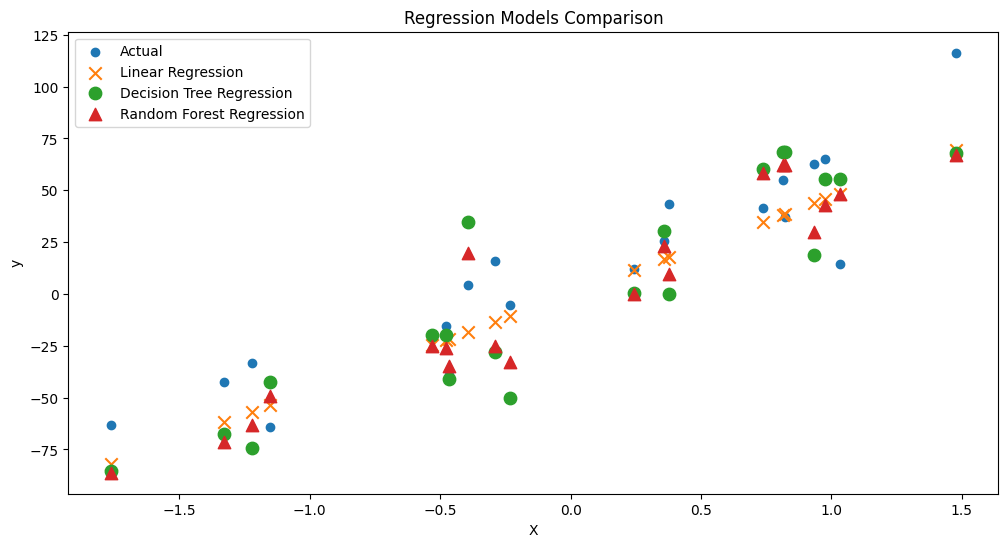

In [34]:
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, y_pred_linear, label="Linear Regression", marker='x', s=80)
plt.scatter(X_test, y_pred_tree, label="Decision Tree Regression", marker='o', s=80)
plt.scatter(X_test, y_pred_rf, label="Random Forest Regression", marker='^', s=80)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regression Models Comparison")
plt.legend()
plt.show()